# Simple stochastic model of mRNA production following a SSA implementation

The Gillespie algorithm, also known as the Stochastic Simulation Algorithm (SSA), is a computational method used to simulate the time evolution of a system with discrete events that occur randomly in time. It is widely used in systems biology to model stochastic processes where the timing of events is important.

In this model we are simulating the creation of mRNA from a specific gene over time in a random way.
Basically, a gene will create a mRNA with a production rate 𝑘 and degradation rate 𝛾𝑚, being m the amount of mRNA present at specific random time.
The production of mRNA from a gene can be simulated using a ODEs system as you see bellow, however, it will give us a deterministic output


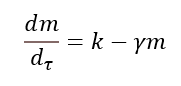

We address the problem by simplificatin of the production and degradation of mRNA over time such as :

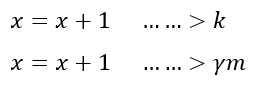


where x represents mRNA, 𝑘 is represented as x + 1, since we are creating mRNA, and 𝛾𝑚 is represented as x-1, because mRNA is being degraded.

In this simple computational implementation we simulate this biologcial process following key concepts:

* Reaction Rates: The algorithm uses reaction rates to determine the likelihood of each possible event (e.g., chemical reactions, gene expression) occurring in the system.
* Stochasticity: It accounts for the inherent randomness in the timing of events, making it suitable for systems with small populations where discrete fluctuations are significant.
* Event Selection: At each step, the algorithm randomly selects the time until the next event and which event occurs based on the reaction rates.

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random 

### Single simulation of a mRNA production

In [ ]:
# Initial conditions
x=[0]   # Initializes the list x to store mRNA quantities, starting with 0.
t=[0]   # Initializes the list t to store time steps, starting at time 0.


# Simulation parameters
tend = 2000    # Sets the simulation end time to x time steps.
k= 2           # Sets the production rate constant.
gamma=0.1      # Sets the degradation rate constant.


# Simulation 
while t[-1] < tend:
    current_x= x[-1]   #Retrieves the current mRNA quantity.
    # Temporary variable 
    rates=[k,gamma*current_x]   # Calculates the production and degradation rates.
    rate_sum = sum(rates)       # Sums the rates to get the total rate.
    
    
    # Determine time step (tau) using exponential distribution 
    tau = np.random.exponential(scale = 1/rate_sum)   #Determines the time step for the next event using an exponential distribution.
    t.append(t[-1] + tau )  # Updates the time list with the new time step.

    # Determine which reaction occurs
    rand= random.uniform(0,1)
    
    
    #Production event 
    if rand * rate_sum > 0 and rand * rate_sum<rates[0]:   # If the random number falls within the range for production, it increases the mRNA quantity by 1.
        x.append(x[-1]+1)
    elif rand * rate_sum > rates[0] and rand * rate_sum<rates[0] + rates[1]:
        x.append(x[-1]-1)


# Plotting
plt.figure(figsize=(10,5))
plt.plot(t,x,color="mediumblue")
plt.xlabel("time-step",size=14)
plt.ylabel("mRNA quantity",size=14)
plt.grid()
plt.show()
    
    

### Multiple simulation to determine the average of mRNA production over time 

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to perform a single simulation of mRNA production and degradation
def g_simulation(tend, k, gamma):
    x = [0]
    t = [0]

    while t[-1] < tend:
        current_x = x[-1]
        rates = [k, gamma * current_x]
        rate_sum = sum(rates)
        tau = np.random.exponential(scale=1 / rate_sum)
        t.append(t[-1] + tau)
        rand = random.uniform(0, 1)

        if rand * rate_sum > 0 and rand * rate_sum < rates[0]:
            x.append(x[-1] + 1)
        elif rand * rate_sum > rates[0] and rand * rate_sum < rates[0] + rates[1]:
            x.append(x[-1] - 1)

    return t, x

# Parameters
tend = 2000
k = 2
gamma = 0.1
num_simulations = 30


# Run multiple simulations
simulations = []
for _ in range(num_simulations):
    t, x = g_simulation(tend, k, gamma)
    simulations.append((t, x))

# Determine common time points for simple statistics
common_times = np.linspace(0, tend, 1000)   # Determining the range of time-steps
quantities = np.zeros((num_simulations, len(common_times)))

# Simulation for time points 
for i, (t, x) in enumerate(simulations):
    interpolated_x = np.interp(common_times, t, x)
    quantities[i, :] = interpolated_x

# Calculate mean and standard deviation
mean = np.mean(quantities, axis=0)
std = np.std(quantities, axis=0)

# Plot individual simulations
plt.figure(figsize=(10, 5))
for t, x in simulations:
    plt.plot(t, x, color="mediumblue", alpha=0.3)

# Plot mean mRNA quantity with error bars
plt.plot(common_times, mean, color="black", label="Mean mRNA Quantity")
plt.fill_between(common_times, mean - std, mean + std, color="black", alpha=0.2, label="Noise")

# Labels and title
plt.xlabel("Time-step",size=14)
plt.ylabel("mRNA Quantity",size=14)
plt.title("Stochasticity of mRNA Production and Degradation",size=16)
plt.legend()
plt.grid()
plt.show()